Following the method outlined in http://ai.stanford.edu/~ang/papers/nips02-metric.pdf

First generate some fake data:

In [1]:
%matplotlib inline

import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt

In [400]:
N = 200

x1 = np.random.normal(1,1,N)
y1 = np.random.normal(1,1,N)

x2 = np.random.normal(10,1,N)
y2 = np.random.normal(1,1,N)

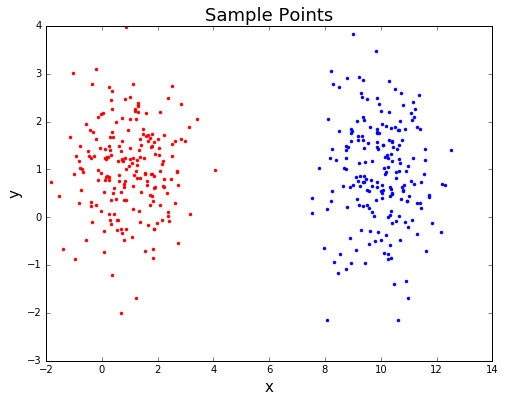

In [401]:
fig = plt.figure()
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.title("Sample Points",size = 18)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
fig.set_size_inches(8, 6)

Define the function to be minimized:

In [402]:
def J(theta):
    function = 0
    for i in range(len(x1)):
        for j in range(len(x2)):
            function += ( theta[0]*(x1[i]-x1[j])**2 + theta[1]*(y1[i]-y1[j])**2 +
                         theta[0]*(x2[i]-x2[j])**2 + theta[1]*(y2[i]-y2[j])**2 )
    constraint = 0
    for i in range(len(x1)):
        j = np.random.randint(0,len(x1)-1)
        constraint += abs(theta[0]*(x1[i]-x2[j])) + abs(theta[1]*(y1[i]-y2[j]))
    
    return function + np.log(constraint)    


In [403]:
def theta1(theta):
    return theta[0]

def theta2(theta):
    return theta[1]

In [404]:
cons = [{'type': 'ineq', 'fun': theta1}, {'type': 'ineq', 'fun': theta2}]

bnds = [(0,None),(0,None)]

In [405]:
theta_init = np.random.random(2)
opt = optimize.minimize(fun=J,x0=theta_init,bounds=bnds,constraints=cons)
theta_min = opt.x
theta_min = theta_min/max(theta_min)
theta_min

array([ 0.08411165,  1.        ])

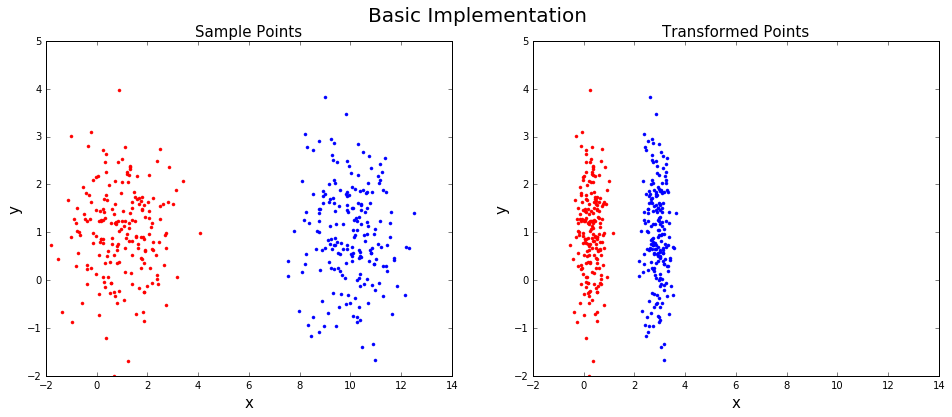

In [407]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.xlim(-2,14)
plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("Sample Points",size=15)

plt.subplot(122)
plt.plot(np.sqrt(theta_min[0])*x1,np.sqrt(theta_min[1])*y1,'r.')
plt.plot(np.sqrt(theta_min[0])*x2,np.sqrt(theta_min[1])*y2,'b.')
plt.xlim(-2,14)
plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("Transformed Points",size=15)

plt.suptitle("Basic Implementation",size=20)

fig.set_size_inches(16, 6)

Now try with the Large Margin Nearest Neighbor (LMNN), Least Squares Metric Learning (LSML), and Neighborhood Components Analysis (NCA) algorithms https://all-umass.github.io/metric-learn/metric_learn.lmnn.html

In [9]:
from metric_learn import LMNN, LSML_Supervised, NCA

In [414]:
X = np.vstack( (np.hstack((x1,x2)) , np.hstack((y1,y2))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(N),np.ones(N)) )

In [415]:
lmnn = LMNN(k=2, learn_rate=1e-6)
lmnn_metric=np.matrix(lmnn.fit(X,Y).metric())
lmnn_metric

matrix([[ 0.00047364,  0.00010771],
        [ 0.00010771,  0.00028478]])

In [416]:
X_transform = lmnn_metric * np.transpose(np.matrix(X))

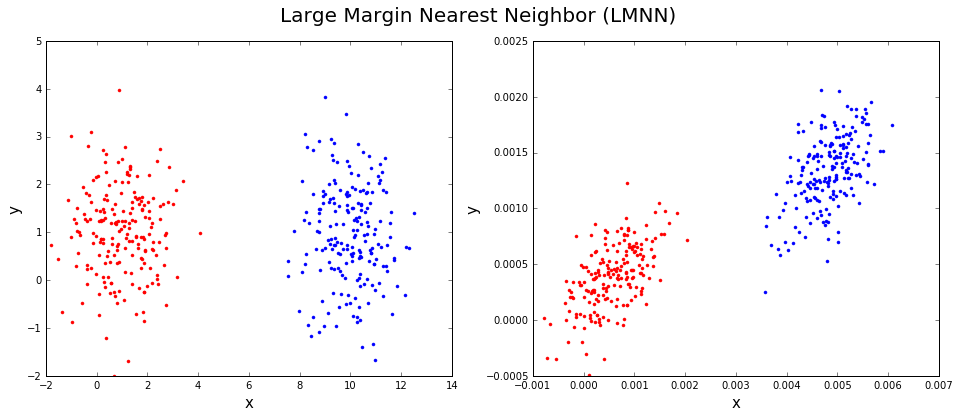

In [417]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.xlim(-2,14)
plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:N-1],X_transform[1,0:N-1],'r.')
plt.plot(X_transform[0,N:],X_transform[1,N:],'b.')
#plt.xlim(-2,14)
#plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Large Margin Nearest Neighbor (LMNN)",size=20)

fig.set_size_inches(16, 6)

In [418]:
lsml = LSML_Supervised(num_constraints=200)
lsml_metric = np.matrix(lsml.fit(X,Y).metric())
lsml_metric

matrix([[ 21.38229311,  -0.23412779],
        [ -0.23412779,   1.00892449]])

In [419]:
X_transform = lsml_metric * np.transpose(np.matrix(X))

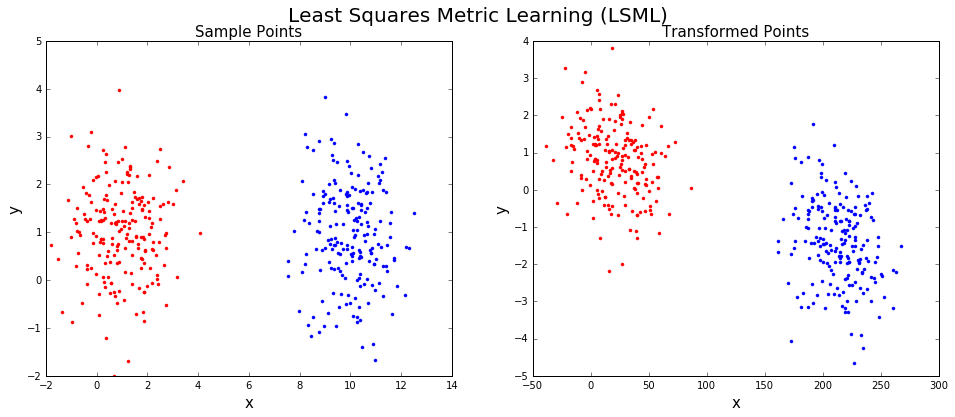

In [421]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.xlim(-2,14)
plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("Sample Points",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:N-1],X_transform[1,0:N-1],'r.')
plt.plot(X_transform[0,N:],X_transform[1,N:],'b.')
#plt.xlim(-2,14)
#plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("Transformed Points",size=15)

plt.suptitle("Least Squares Metric Learning (LSML)",size=20)

fig.set_size_inches(16, 6)

In [422]:
nca = NCA(max_iter=1000, learning_rate=0.01)
nca_metric = np.matrix(nca.fit(X, Y).metric())

In [423]:
X_transform = nca_metric * np.transpose(np.matrix(X))

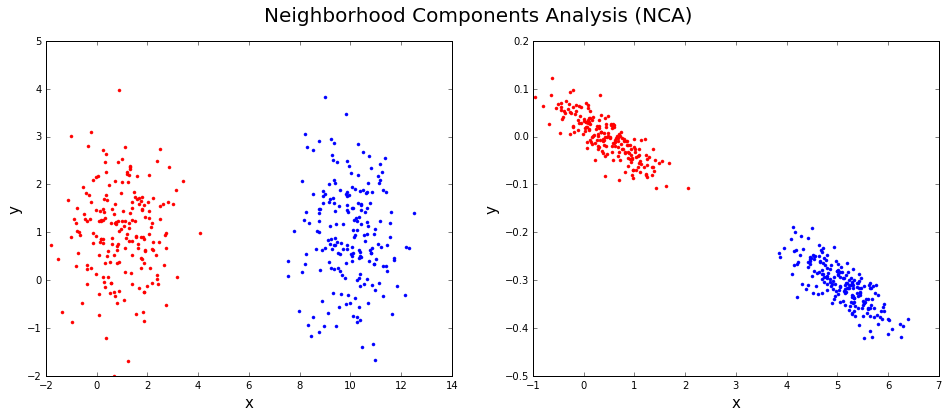

In [424]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.xlim(-2,14)
plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:N-1],X_transform[1,0:N-1],'r.')
plt.plot(X_transform[0,N:],X_transform[1,N:],'b.')
#plt.xlim(-2,14)
#plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Neighborhood Components Analysis (NCA)",size=20)

fig.set_size_inches(16, 6)

Now let's try things on a more realistic data set...

In [2]:
def data():
    N = np.random.randint(200,400)
    c = 2*np.random.random()
    x1 = np.random.normal(c/2,0.25,N)
    y1 = np.random.normal(c,0.5,N)
    
    N = np.random.randint(200,400)
    y2 = np.random.normal(0,2,N)
    x2 = np.exp(-(y2**2)/(2*2**2))*(1/np.sqrt(2*np.pi*2**2)) + np.random.normal(0,0.05,N)
    theta = (np.pi/4)*np.random.random()
    x2 = np.cos(theta)*x2 - np.sin(theta)*y2
    y2 = np.sin(theta)*x2 + np.cos(theta)*y2
    
    N = np.random.randint(200,400)
    c = 2*np.random.random()
    x3 = np.random.normal(c+0.4,0.5,N)
    y3 = np.random.normal(c,1.6,N)
    
    c = 2*np.random.random()
    N = np.random.randint(200,400)
    x4 = np.random.normal(c-0.9,0.25,N)
    y4 = np.random.normal(c-0.6,1.5,N)
    
    return x1,y1,x2,y2,x3,y3,x4,y4

In [710]:
x1,y1,x2,y2,x3,y3,x4,y4 = data()

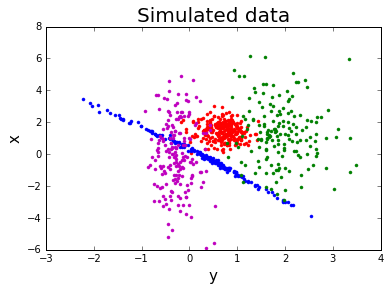

In [711]:
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("y",size=15)
plt.ylabel("x",size=15)
plt.title("Simulated data",size=20)

Now assemble the dataset and optimize the metric

In [712]:
X = np.vstack( (np.hstack((x1,x2,x3,x4)) , np.hstack((y1,y2,y3,y4))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(len(x1)),np.ones(len(x2)),2*np.ones(len(x3)),3*np.ones(len(x4))) )

In [713]:
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn_metric=np.matrix(lmnn.fit(X,Y).metric())
lmnn_metric

matrix([[ 8.85667709, -0.83339851],
        [-0.83339851,  9.22151717]])

In [714]:
X_transform = lmnn_metric * np.transpose(np.matrix(X))

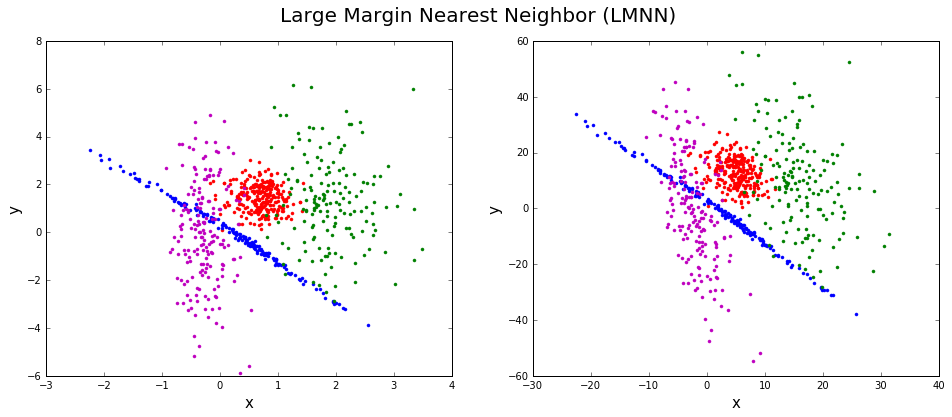

In [715]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[1,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[1,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[1,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Large Margin Nearest Neighbor (LMNN)",size=20)

fig.set_size_inches(16, 6)

In [716]:
lsml = LSML_Supervised(num_constraints=200)
lsml_metric = np.matrix(lsml.fit(X,Y).metric())
lsml_metric

matrix([[ 1.37289358,  0.3548903 ],
        [ 0.3548903 ,  0.72215776]])

In [717]:
X_transform = lsml_metric * np.transpose(np.matrix(X))

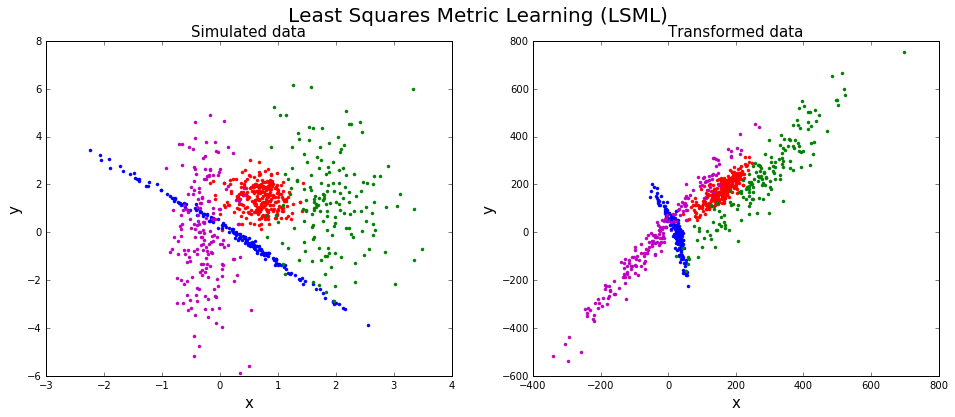

In [721]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("Simulated data",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[1,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[1,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[1,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("Transformed data",size=15)

plt.suptitle("Least Squares Metric Learning (LSML)",size=20)

fig.set_size_inches(16, 6)

In [722]:
nca = NCA(max_iter=1000, learning_rate=0.01)
nca_metric = np.matrix(nca.fit(X, Y).metric())

In [723]:
X_transform = nca_metric * np.transpose(np.matrix(X))

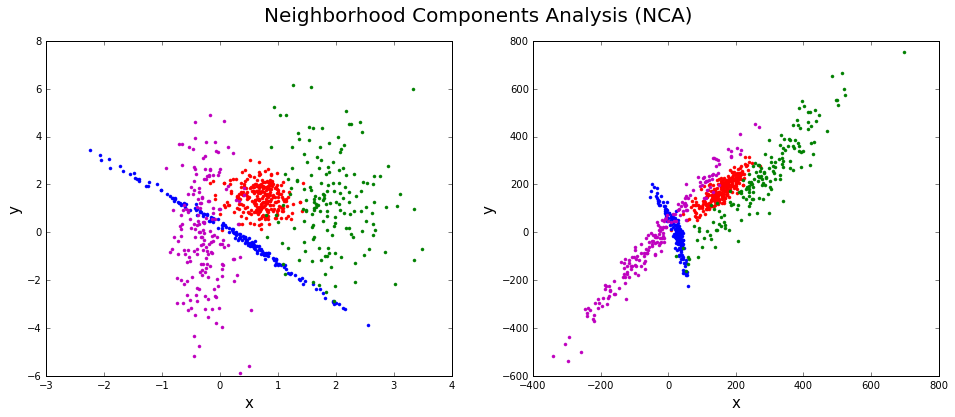

In [724]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[1,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[1,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[1,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Neighborhood Components Analysis (NCA)",size=20)

fig.set_size_inches(16, 6)

Hmm...so it doesn't really work very well if there are overlapping structures in the space.  Could try to add more features...

In [725]:
X = np.vstack( (np.hstack((x1,x2,x3,x4)) , np.hstack((y1,y2,y3,y4)) ,
               (np.hstack((x1**2,x2**2,x3**2,x4**2)) , np.hstack((y1**2,y2**2,y3**2,y4**2)))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(len(x1)),np.ones(len(x2)),2*np.ones(len(x3)),3*np.ones(len(x4))) )

In [726]:
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn_metric=np.matrix(lmnn.fit(X,Y).metric())
lmnn_metric

matrix([[ 6.70273397,  0.47132287,  0.26612225, -0.44967009],
        [ 0.47132287,  1.37427244, -0.06204628,  0.46421277],
        [ 0.26612225, -0.06204628,  0.0284402 , -0.03007959],
        [-0.44967009,  0.46421277, -0.03007959,  0.63407914]])

In [727]:
X_transform = lmnn_metric * np.transpose(np.matrix(X))

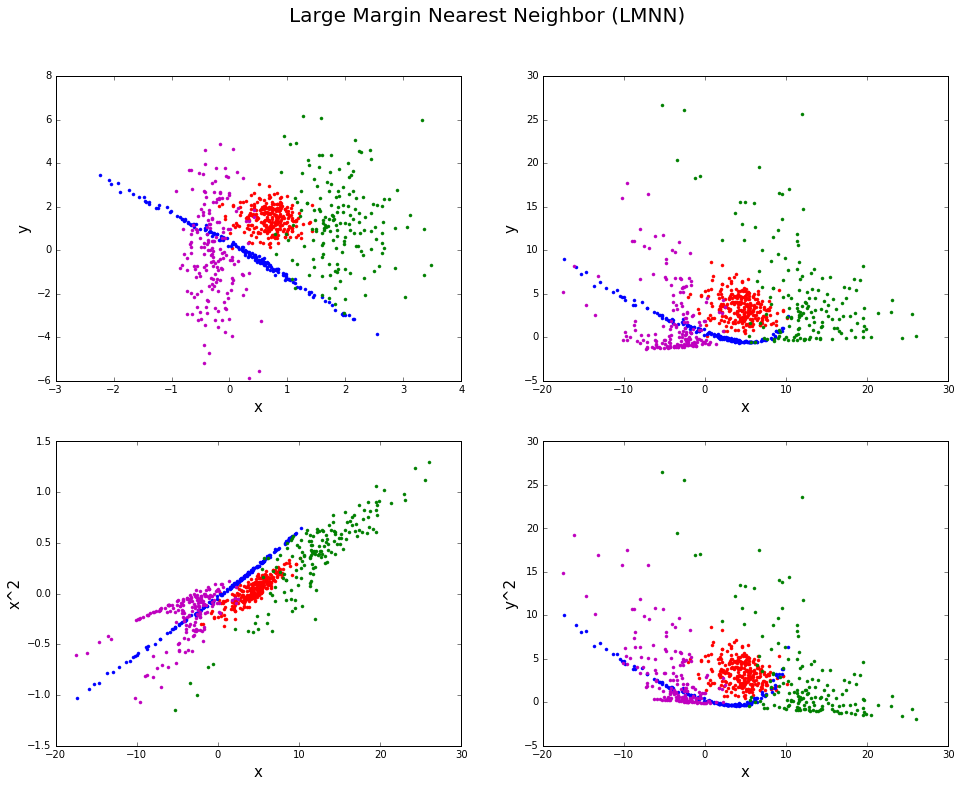

In [728]:
fig = plt.figure()

plt.subplot(221)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(222)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[1,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[1,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[1,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(223)
plt.plot(X_transform[0,0:len(x1)],X_transform[2,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[2,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[2,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[2,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("x^2",size=15)

plt.subplot(224)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[3,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[3,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[3,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y^2",size=15)

plt.suptitle("Large Margin Nearest Neighbor (LMNN)",size=20)

fig.set_size_inches(16, 12)

Okay, so maybe adding more features helps with separating the clusters (but this is true irrespective of using the metric optimization).  Anyway, we can test whether or not this metric optimization helps clustering with K-means, so let's go back to the simpler problem:

In [200]:
x1,y1,x2,y2,x3,y3,x4,y4 = data()

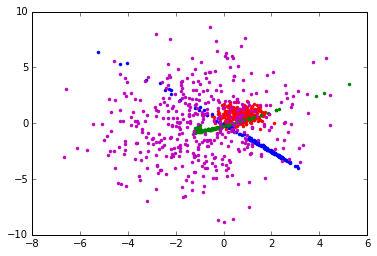

In [201]:
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')

In [202]:
X = np.vstack( (np.hstack((x1,x2,x3,x4)) , np.hstack((y1,y2,y3,y4))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(len(x1)),np.ones(len(x2)),2*np.ones(len(x3)),3*np.ones(len(x4))) )

In [203]:
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn_metric=np.matrix(lmnn.fit(X,Y).metric())
lmnn_metric

matrix([[ 5.58717192, -0.2594879 ],
        [-0.2594879 ,  5.45614071]])

In [204]:
X_transform = lmnn_metric * np.transpose(np.matrix(X))

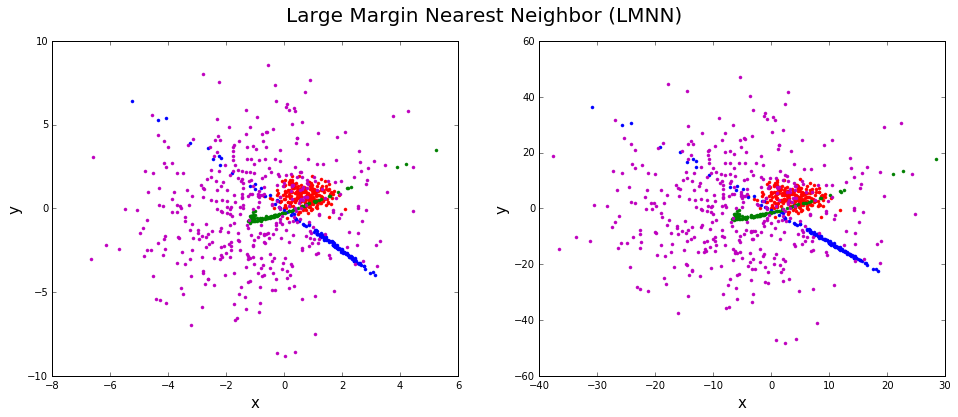

In [205]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[1,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[1,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[1,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Large Margin Nearest Neighbor (LMNN)",size=20)

fig.set_size_inches(16, 6)

In [22]:
x1t,y1t,x2t,y2t,x3t,y3t,x4t,y4t = data()

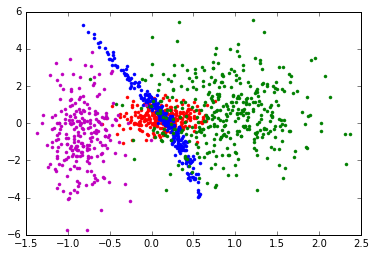

In [23]:
plt.plot(x1t,y1t,'r.')
plt.plot(x2t,y2t,'b.')
plt.plot(x3t,y3t,'g.')
plt.plot(x4t,y4t,'m.')

In [24]:
X = np.vstack( (np.hstack((x1t,x2t,x3t,x4t)) , np.hstack((y1t,y2t,y3t,y4t))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(len(x1t)),np.ones(len(x2t)),2*np.ones(len(x3t)),3*np.ones(len(x4t))) )

In [25]:
lsml = LSML_Supervised(num_constraints=200)
lsml_metric = np.matrix(lsml.fit(X,Y).metric())
lsml_metric

matrix([[ 0.91699386,  0.29918859],
        [ 0.29918859,  0.5447141 ]])

In [26]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.mixture import GMM

In [93]:
x1t,y1t,x2t,y2t,x3t,y3t,x4t,y4t = data()

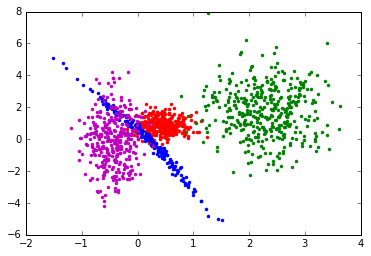

In [114]:
plt.plot(x1t,y1t,'r.')
plt.plot(x2t,y2t,'b.')
plt.plot(x3t,y3t,'g.')
plt.plot(x4t,y4t,'m.')

In [147]:
X = np.vstack( (np.hstack((x1t,x2t,x3t,x4t)) , np.hstack((y1t,y2t,y3t,y4t))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(len(x1t)),np.ones(len(x2t)),2*np.ones(len(x3t)),3*np.ones(len(x4t))) )

A = np.matrix(X) * np.transpose(lsml_metric)

In [148]:
A.shape

(1273, 2)

In [149]:
np.random.shuffle(X)

In [159]:
# Y_pred = KMeans(n_clusters=4,max_iter=700,init='random',n_init=25).fit_predict(X)
km = KMeans(n_clusters=4,max_iter=20000,init='k-means++',n_init=1000,tol=0.000000001)
Y_pred = km.fit_predict(X)

#Y_pred_DB = DBSCAN(min_samples=20).fit(X).labels_
Y_pred_GM = GMM(n_components=4,n_init=400).fit_predict(X)

In [160]:
print(metrics.normalized_mutual_info_score(Y_pred, Y),
metrics.normalized_mutual_info_score(Y_pred_GM, Y))

0.0020518903105 0.00100363146193


In [162]:
xs=np.hstack((x1t,x2t,x3t,x4t))
ys = np.hstack((y1t,y2t,y3t,y4t))


In [161]:
Y_pred_trans = KMeans(n_clusters=4,max_iter=20000,init='k-means++',n_init=1000,tol=0.000000001).fit_predict(A)
#Y_pred_trans_DB = DBSCAN(min_samples=10).fit(np.matrix(X) * np.transpose(lmnn_metric)).labels_
Y_pred_trans_GM = GMM(n_components=4,n_init=400).fit_predict(A)

In [163]:
print(metrics.normalized_mutual_info_score(Y_pred_trans, Y),
metrics.normalized_mutual_info_score(Y_pred_trans_GM, Y))

0.532368285703 0.521423671935


In [164]:
X_transform = lsml_metric * np.transpose(np.matrix(X))

In [165]:
X_transform.shape

(2, 1273)

In [166]:
X.shape

(1273, 2)

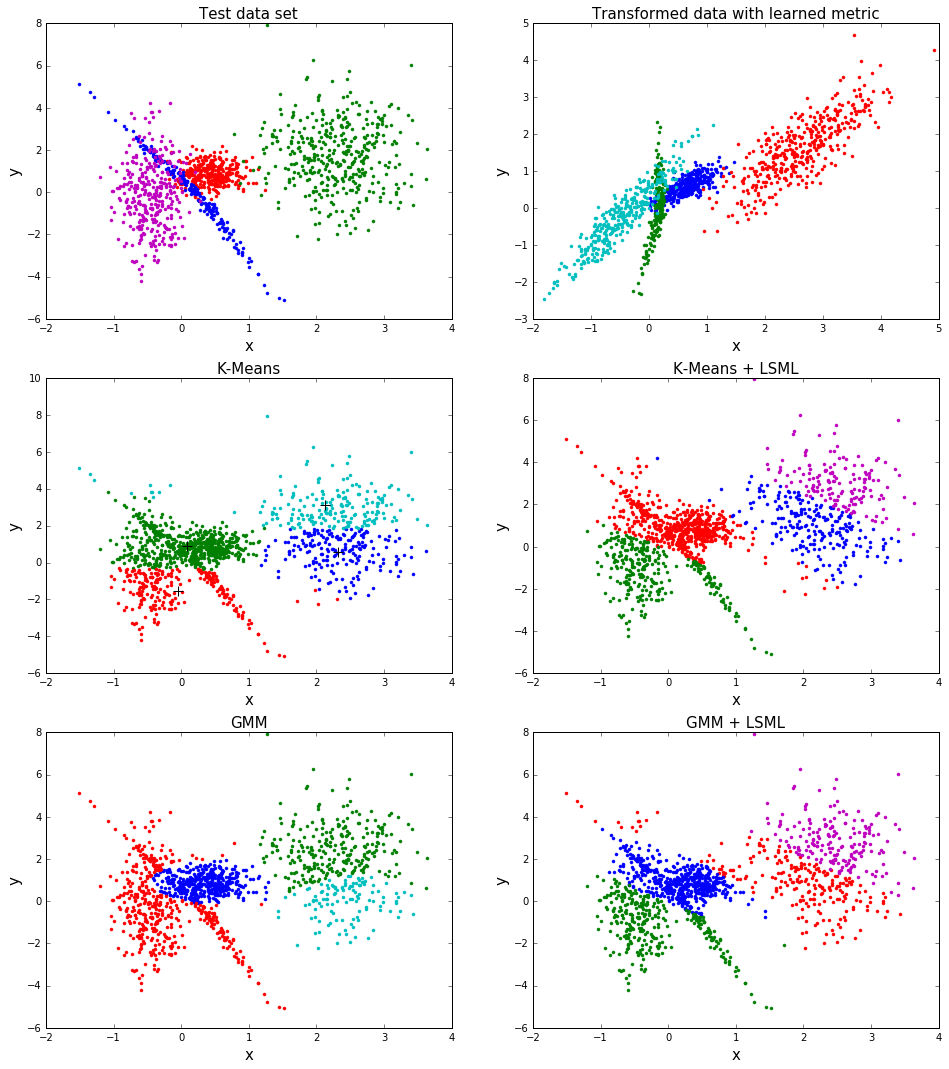

In [173]:
fig = plt.figure()

plt.subplot(321)
plt.plot(x1t,y1t,'r.')
plt.plot(x2t,y2t,'b.')
plt.plot(x3t,y3t,'g.')
plt.plot(x4t,y4t,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("Test data set",size=15)

plt.subplot(322)
for i in range(4):
    plt.plot(A[Y==i,0],A[Y==i,1],marker='.', linestyle='none')
#plt.plot(X_transform[0,0:len(x1t)],X_transform[1,0:len(x1t)],'r.')
#plt.plot(X_transform[0,len(x1t):len(x1t)+len(x2t)],X_transform[1,len(x1t):len(x1t)+len(x2t)],'b.')
#plt.plot(X_transform[0,len(x1t)+len(x2t):len(x1t)+len(x2t)+len(x3t)],X_transform[1,len(x1t)+len(x2t):len(x1t)+len(x2t)+len(x3t)],'g.')
#plt.plot(X_transform[0,len(x1t)+len(x2t)+len(x3t):],X_transform[1,len(x1t)+len(x2t)+len(x3t):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("Transformed data with learned metric",size=15)

plt.subplot(323)
for i in range(4):
    plt.plot(X[Y_pred==i,0],X[Y_pred==i,1],marker='.', linestyle='none')
# plt.plot(xs[Y_pred==1],ys[Y_pred==1],'b.')
# plt.plot(xs[Y_pred==2],ys[Y_pred==2],'g.')
# plt.plot(xs[Y_pred==3],ys[Y_pred==3],'m.')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='+', s=100, zorder=1000, color='k')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("K-Means",size=15)

plt.subplot(324)
#for i in range(4):
#    plt.plot(X[Y_pred_trans==i,0],X[Y_pred_trans==i,1],marker='.', linestyle='none')
plt.plot(xs[Y_pred_trans==0],ys[Y_pred_trans==0],'r.')
plt.plot(xs[Y_pred_trans==1],ys[Y_pred_trans==1],'b.')
plt.plot(xs[Y_pred_trans==2],ys[Y_pred_trans==2],'g.')
plt.plot(xs[Y_pred_trans==3],ys[Y_pred_trans==3],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("K-Means + LSML",size=15)

plt.subplot(325)
for i in range(4):
    plt.plot(X[Y_pred_GM==i,0],X[Y_pred_GM==i,1],marker='.', linestyle='none')
# plt.plot(xs[Y_pred_GM==0],ys[Y_pred_GM==0],'r.')
# plt.plot(xs[Y_pred_GM==1],ys[Y_pred_GM==1],'b.')
# plt.plot(xs[Y_pred_GM==2],ys[Y_pred_GM==2],'g.')
# plt.plot(xs[Y_pred_GM==3],ys[Y_pred_GM==3],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("GMM",size=15)

plt.subplot(326)
#for i in range(4):
#    plt.plot(X[Y_pred_trans_GM==i,0],X[Y_pred_trans_GM==i,1],marker='.', linestyle='none')
plt.plot(xs[Y_pred_trans_GM==0],ys[Y_pred_trans_GM==0],'r.')
plt.plot(xs[Y_pred_trans_GM==1],ys[Y_pred_trans_GM==1],'b.')
plt.plot(xs[Y_pred_trans_GM==2],ys[Y_pred_trans_GM==2],'g.')
plt.plot(xs[Y_pred_trans_GM==3],ys[Y_pred_trans_GM==3],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.title("GMM + LSML",size=15)


fig.set_size_inches(16, 18)